In [0]:
# The code starting from here is for setting up the environment of Google colab
# We need to connect google colab to google drive so that we can save the files and call scripts in the google drive
# We also need to install the related package: for example allennlp
# There will be an indicator to show where this code part ends


In [1]:
from google.colab import drive
drive.mount('/content/gdrive')



Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
# Install a Drive FUSE wrapper.
# https://github.com/astrada/google-drive-ocamlfuse
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 130912 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.3-0ubuntu3~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.3-0ubuntu3~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.3-0ubuntu3~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...


In [0]:
# Generate auth tokens for Colab
from google.colab import auth
auth.authenticate_user()

In [5]:
# Generate creds for the Drive FUSE library.
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}


··········


In [0]:
# Create a directory and mount Google Drive using that directory.
!mkdir -p drive
!google-drive-ocamlfuse drive

In [0]:
# http://pytorch.org/
from os import path
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())

accelerator = 'cu80' if path.exists('/opt/bin/nvidia-smi') else 'cpu'

!pip3 install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.0-{platform}-linux_x86_64.whl torchvision

In [7]:
!pip install overrides

  Stored in directory: /root/.cache/pip/wheels/8d/52/86/e5a83b1797e7d263b458d2334edd2704c78508b3eea9323718
Successfully built overrides


In [8]:
!pip install allennlp

     |████████████████████████████████| 5.7MB 3.2MB/s 
     |████████████████████████████████| 51kB 26.0MB/s 
     |████████████████████████████████| 245kB 59.7MB/s 
     |████████████████████████████████| 51kB 27.9MB/s 
     |████████████████████████████████| 133kB 52.7MB/s 
     |████████████████████████████████| 1.6MB 52.6MB/s 
     |████████████████████████████████| 256kB 63.1MB/s 
     |████████████████████████████████| 245kB 46.9MB/s 
     |████████████████████████████████| 51kB 26.1MB/s 
  Stored in directory: /root/.cache/pip/wheels/51/30/d1/92a39ba40f21cb70e53f8af96eb98f002a781843c065406500
  Stored in directory: /root/.cache/pip/wheels/b7/8d/e7/a0e74217da5caeb3c1c7689639b6d28ddbf9985b840bc96a9a
  Stored in directory: /root/.cache/pip/wheels/1a/30/ab/ae4a57b1df44fa20a531edb9601b27603da8f5336225691f3f
  Stored in directory: /root/.cache/pip/wheels/46/2f/53/5f5c1d275492f2fce1cdab9a9bb12d49286dead829a4078e0e
Successfully built numpydoc parsimonious jsonnet word2number
ERROR: awsc

In [9]:
import os
!ls
os.chdir('./drive/269')

adc.json  drive  gdrive  sample_data


In [0]:
# Here we end the code for environment setting and begin the main part of the code
# In this code, we use ELMO as word embedding and LEAM as our model
# The tutorial of AllenNLP is http://mlexplained.com/2019/01/30/an-in-depth-tutorial-to-allennlp-from-basics-to-elmo-and-bert/
# In this tutorial there is also instructions about how to change ELMO to BERT
# to change the model to BERT, code need to be changed includes following codes in this notebook, model.py  maybe also trainer.py 

In [0]:
import os
from main import main
from src.model import *
from src.utils import *
from src.trainer import *

In [0]:
# we first deal with the data
# to satisfy the requirements of AllenNLP api, we first save our data to pickle file
if not os.path.exists('train.pickle') or not os.path.exists('test.pickle') or not os.path.exists('class_name.pickle'):    
    data_dir = 'data/reuters'
    vocab_url = os.path.join(data_dir, 'vocab.pkl')
    train_url = os.path.join(data_dir, 'train')
    test_url = os.path.join(data_dir, 'test')
    vocab = pickle.load(open(vocab_url, 'rb'))
    vocab = list(zip(*sorted(vocab.items(), key=lambda x: x[1])))[0]
    vocab_size = len(vocab)

    train_set, train_labels, class_names = dataset(train_url)
    test_set, test_labels, _ = dataset(test_url)



    train_text = []
    for idx_list in train_set:
        s = ""
        for idx in idx_list:
            s += vocab[idx] + " " 
        train_text.append(s)

    test_text = []
    for idx_list in test_set:
        s = ""
        for idx in idx_list:
            s += vocab[idx] + " " 
        test_text.append(s)
    train = {'text': train_text,
            'id': np.arange(len(train_text)),
            'labels': train_labels}
    with open('train.pickle', 'wb') as handle:
        pickle.dump(train, handle, protocol=pickle.HIGHEST_PROTOCOL)

    test = {'text': test_text,
            'id': np.arange(len(test_text)),
            'labels': test_labels}
    with open('test.pickle', 'wb') as handle:
        pickle.dump(test, handle, protocol=pickle.HIGHEST_PROTOCOL)

    class_name = {'name': class_names} 
    with open('class_name.pickle', 'wb') as handle:
        pickle.dump(class_name, handle, protocol=pickle.HIGHEST_PROTOCOL)


In [0]:
from pathlib import Path
from typing import *
import torch
import torch.optim as optim
import numpy as np
import pandas as pd
import pickle
from functools import partial
from overrides import overrides

from allennlp.data import Instance
from allennlp.data.token_indexers import TokenIndexer
from allennlp.data.tokenizers import Token
from allennlp.nn import util as nn_util
from allennlp.data.vocabulary import Vocabulary
from allennlp.data.dataset_readers import DatasetReader

In [13]:
# allennlp API for data preprocessing 
from allennlp.data.fields import TextField, MetadataField, ArrayField

class JigsawDatasetReader(DatasetReader):
    def __init__(self, tokenizer: Callable[[str], List[str]]=lambda x: x.split(),
                 token_indexers: Dict[str, TokenIndexer] = None,
                 max_seq_len: Optional[int]=80) -> None:
        super().__init__(lazy=False)
        self.tokenizer = tokenizer
        self.token_indexers = token_indexers or {"tokens": SingleIdTokenIndexer()}
        self.max_seq_len = max_seq_len

    @overrides
    def text_to_instance(self, tokens: List[Token], id: str,
                         labels: np.ndarray) -> Instance:
        sentence_field = TextField(tokens, self.token_indexers)
        fields = {"tokens": sentence_field}
        
        id_field = MetadataField(id)
        fields["id"] = id_field
        
        label_field = ArrayField(array=labels)
        fields["label"] = label_field

        return Instance(fields)
    
    @overrides
    def _read(self, file_path: str) -> Iterator[Instance]:
        with open(file_path, 'rb') as handle:
            b = pickle.load(handle)
        text = b['text']
        idx = b['id']
        labels = b['labels']
        assert len(text) == len(idx) and len(text) == len(labels)
        for i in range(len(text)):
            yield self.text_to_instance(
                [Token(x) for x in self.tokenizer(text[i])],
                idx[i], labels[i],
            )
from allennlp.data.tokenizers.word_splitter import SpacyWordSplitter
from allennlp.data.token_indexers.elmo_indexer import ELMoCharacterMapper, ELMoTokenCharactersIndexer

# the token indexer is responsible for mapping tokens to integers
token_indexer = ELMoTokenCharactersIndexer()

reader = JigsawDatasetReader(
    token_indexers={"tokens": token_indexer}
)
with open('class_name.pickle', 'rb') as handle:
     tmp = pickle.load(handle)
class_names = tmp['name']
print(class_names)

train_ds, test_ds = (reader.read(fname) for fname in ["train.pickle", "test.pickle"])
val_ds = None
vocab = Vocabulary()


0it [00:00, ?it/s]

['acq' 'alum' 'barley' 'bop' 'carcass' 'castor-oil' 'cocoa' 'coconut'
 'coconut-oil' 'coffee' 'copper' 'copra-cake' 'corn' 'cotton' 'cotton-oil'
 'cpi' 'cpu' 'crude' 'dfl' 'dlr' 'dmk' 'earn' 'fuel' 'gas' 'gnp' 'gold'
 'grain' 'groundnut' 'groundnut-oil' 'heat' 'hog' 'housing' 'income'
 'instal-debt' 'interest' 'ipi' 'iron-steel' 'jet' 'jobs' 'l-cattle'
 'lead' 'lei' 'lin-oil' 'livestock' 'lumber' 'meal-feed' 'money-fx'
 'money-supply' 'naphtha' 'nat-gas' 'nickel' 'nkr' 'nzdlr' 'oat' 'oilseed'
 'orange' 'palladium' 'palm-oil' 'palmkernel' 'pet-chem' 'platinum'
 'potato' 'propane' 'rand' 'rape-oil' 'rapeseed' 'reserves' 'retail'
 'rice' 'rubber' 'rye' 'ship' 'silver' 'sorghum' 'soy-meal' 'soy-oil'
 'soybean' 'strategic-metal' 'sugar' 'sun-meal' 'sun-oil' 'sunseed' 'tea'
 'tin' 'trade' 'veg-oil' 'wheat' 'wpi' 'yen' 'zinc']


6215it [00:05, 1189.16it/s]
1554it [00:03, 465.32it/s]


In [0]:
from allennlp.data.iterators import BucketIterator
iterator = BucketIterator(batch_size=30, sorting_keys=[("tokens", "num_tokens")])
iterator.index_with(vocab)
model = Leam_Classifier(len(class_names), 256, 256, 10, 
                            n_layer=1, dropout_rate=0.5, embpath=None, label_att=True, multilabel=True)
model.load_state_dict(torch.load('model1.pth'))
trainer = Trainer(iterator, batch_size=30, num_epoches=50, learning_rate=3e-4, valid_freq=10, model_type='embed')
trainer.set_validation(test_ds)
trainer.init_model(model)

Leam_Classifier(
  (embedding): Embedding(
    (word_embeddings): BasicTextFieldEmbedder(
      (token_embedder_tokens): ElmoTokenEmbedder(
        (_elmo): Elmo(
          (_elmo_lstm): _ElmoBiLm(
            (_token_embedder): _ElmoCharacterEncoder(
              (char_conv_0): Conv1d(16, 32, kernel_size=(1,), stride=(1,))
              (char_conv_1): Conv1d(16, 32, kernel_size=(2,), stride=(1,))
              (char_conv_2): Conv1d(16, 64, kernel_size=(3,), stride=(1,))
              (char_conv_3): Conv1d(16, 128, kernel_size=(4,), stride=(1,))
              (char_conv_4): Conv1d(16, 256, kernel_size=(5,), stride=(1,))
              (char_conv_5): Conv1d(16, 512, kernel_size=(6,), stride=(1,))
              (char_conv_6): Conv1d(16, 1024, kernel_size=(7,), stride=(1,))
              (_highways): Highway(
                (_layers): ModuleList(
                  (0): Linear(in_features=2048, out_features=4096, bias=True)
                )
              )
              (_projection): Li

In [0]:
# train the model and save the result
#trainer.model.load_state_dict(torch.load('model1.pth'))

train_prob, train_beta = trainer.fit(train_ds, class_names)
torch.save(trainer.model.state_dict(), 'model.pth')

--- epoch: 0 ---
[0/50] loss_epoch : 0.01 val_match : 0.9324 match_epoch : 0.9508 val_hs : 0.8858 hs_epoch : 0.8537
--- epoch: 10 ---
[10/50] loss_epoch : 0.01 val_match : 0.9279 match_epoch : 0.9532 val_hs : 0.8817 hs_epoch : 0.8567
--- epoch: 20 ---
[20/50] loss_epoch : 0.01 val_match : 0.9363 match_epoch : 0.9533 val_hs : 0.8910 hs_epoch : 0.8447
--- epoch: 30 ---
[30/50] loss_epoch : 0.01 val_match : 0.9402 match_epoch : 0.9616 val_hs : 0.8907 hs_epoch : 0.8616
--- epoch: 40 ---
[40/50] loss_epoch : 0.01 val_match : 0.9408 match_epoch : 0.9638 val_hs : 0.8913 hs_epoch : 0.8649
Max_scores 0.9407979407979408 0.8913158056015198
training {'match': 0.9852564102564103, 'HS': 0.9574205713268212, 'f1': 0.9668891520956, 'HL': 0.0011004273504273505, 'exact_acc': 0.9227564102564103, 'min_acc': 0.9900641025641026, 'density_chosen': 0.01338497150997151, 'density': 0.01375534188034188, 'precision': 0.967348455942206, 'recal': 0.9743028846144864, 'no_pred': 0.007211538461538462}
validation {'matc

In [0]:
# here we load the pretrained model intorch.save(trainer.model.state_dict(), 'model.pth')
# trainer.model.load_state_dict(torch.load('model.pth'))
# first test it on the validation set to see wheter we have loaded in the right model
prob, _ = trainer.predict()
tmp = trainer.val_y.detach().cpu().numpy()
pred = prob > 0.5                
val_match = np.mean([(pred[i][tmp[i]==1]==1).any() for i in range(len(pred))])
val_hs = (((pred==1)*(tmp==1)).sum(1)/(((pred==1)+(tmp==1))>0).sum(1)).mean()

print("Validation result: ",
    "val_match : %0.4f" % val_match,
    "val_hs : %0.4f" % val_hs
  ) 

Validation result:  val_match : 0.9408 val_hs : 0.8913


In [15]:
# load in the testset
# original res testing result:  test_match : 0.9156 test_hs : 0.8540
if not os.path.exists('task.pickle'):
  task_url = os.path.join(data_dir, 'task')
  seq_task, task_labels, _ = dataset(task_url, monitor=False)
  vocab = pickle.load(open(vocab_url, 'rb'))
  vocab = list(zip(*sorted(vocab.items(), key=lambda x: x[1])))[0]
  task_text = []
  for idx_list in seq_task:
      s = ""
      for idx in idx_list:
          s += vocab[idx] + " " 
      task_text.append(s)
  task = {'text': task_text,
          'id': np.arange(len(task_text)),
          'labels': task_labels}
  with open('task.pickle', 'wb') as handle:
      pickle.dump(task, handle, protocol=pickle.HIGHEST_PROTOCOL)
task_ds = reader.read('task.pickle')


'''
trainer.set_validation(task_ds)
prob, _ = trainer.predict()
tmp = trainer.val_y.detach().cpu().numpy()
pred = prob > 0.5                
test_match = np.mean([(pred[i][tmp[i]==1]==1).any() for i in range(len(pred))])
test_hs = (((pred==1)*(tmp==1)).sum(1)/(((pred==1)+(tmp==1))>0).sum(1)).mean()

print("testing result: ",
    "test_match : %0.4f" % test_match,
    "test_hs : %0.4f" % test_hs
  ) 
'''


3019it [00:01, 1519.47it/s]


'\ntrainer.set_validation(task_ds)\nprob, _ = trainer.predict()\ntmp = trainer.val_y.detach().cpu().numpy()\npred = prob > 0.5                \ntest_match = np.mean([(pred[i][tmp[i]==1]==1).any() for i in range(len(pred))])\ntest_hs = (((pred==1)*(tmp==1)).sum(1)/(((pred==1)+(tmp==1))>0).sum(1)).mean()\n\nprint("testing result: ",\n    "test_match : %0.4f" % test_match,\n    "test_hs : %0.4f" % test_hs\n  ) \n'

In [16]:
# seems the original code (code used when doing this experiments) doesn't save the final model to trainer.model
# so here we manually load the model in trainer and do evaluation here
# best testing result:  test_match : 0.9162 test_hs : 0.8686

from allennlp.data.iterators import BucketIterator
iterator = BucketIterator(batch_size=30, sorting_keys=[("tokens", "num_tokens")])
iterator.index_with(vocab)
model = Leam_Classifier(len(class_names), 256, 256, 10, 
                            n_layer=1, dropout_rate=0.5, embpath=None, label_att=True, multilabel=True)
model.load_state_dict(torch.load('model.pth'))
trainer = Trainer(iterator, batch_size=30, num_epoches=50, learning_rate=3e-4, valid_freq=10, model_type='embed')

trainer.init_model(model)
trainer.set_validation(task_ds)
prob, _ = trainer.predict()
tmp = trainer.val_y.detach().cpu().numpy()
pred = prob > 0.5                
test_match = np.mean([(pred[i][tmp[i]==1]==1).any() for i in range(len(pred))])
test_hs = (((pred==1)*(tmp==1)).sum(1)/(((pred==1)+(tmp==1))>0).sum(1)).mean()

precision_list = []
recall_list = []
for i in range(101):
    cur_thresh = i * 0.01
    pred = prob > cur_thresh
    precision = (((pred==1)*(tmp==1)).sum(1) / ((pred==1)).sum(1)).mean()
    recall =  (((pred==1)*(tmp==1)).sum(1) / ((tmp==1)).sum(1)).mean()
    precision_list.append(precision)
    recall_list.append(recall)
    

print("testing result: ",
    "test_match : %0.4f" % test_match,
    "test_hs : %0.4f" % test_hs
  ) 



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in true_divide


testing result:  test_match : 0.9119 test_hs : 0.8693


0.49001580205700895
0.7466388728052563


Text(0.5, 1.0, 'ROC curve')

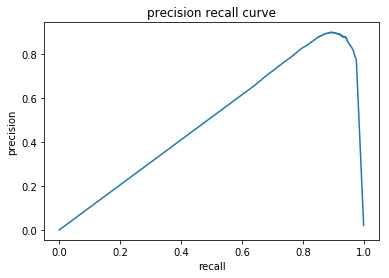

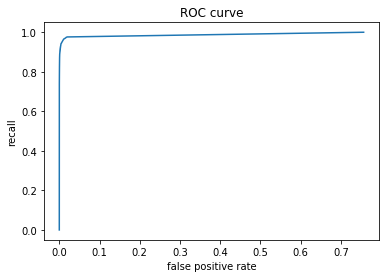

In [53]:
precision_list = []
recall_list = []
fp_list = []
for i in range(0, 10001):
    cur_thresh = i * 0.0001
    pred = (prob > cur_thresh).astype(np.int)
    precision = ((pred * tmp).sum(1) / (pred.sum(1) + 1e-5)).mean()
    recall =  ((pred * tmp).sum(1) / (tmp.sum(1) + 1e-5)).mean()
    fp = 1 - ((((pred == 0) * (tmp ==0)).sum(1)) / ((tmp==0).sum(1) + 1e-5)).mean()
    precision_list.append(precision)
    recall_list.append(recall)
    fp_list.append(fp)
#print(precision_list)
#print(recall_list)
from sklearn.metrics import auc
from matplotlib import pyplot as plt
myauc = auc(recall_list, precision_list)
print(myauc)
plt.figure()
plt.plot(recall_list, precision_list)
plt.ylabel('precision')
plt.xlabel('recall')
plt.title('precision recall curve')

myauc= auc(fp_list, recall_list)
print(myauc)
plt.figure()
plt.plot(fp_list, recall_list)
plt.ylabel('recall')
plt.xlabel('false positive rate')
plt.title('ROC curve')



In [0]:
torch.save(model.state_dict(), 'model.pth')

In [0]:
# here we try to use ELMO without LEAM
from allennlp.data.iterators import BucketIterator
iterator = BucketIterator(batch_size=30, sorting_keys=[("tokens", "num_tokens")])
iterator.index_with(vocab)
model = Leam_Classifier(len(class_names), 256, 256, 10, 
                            n_layer=1, dropout_rate=0.5, embpath=None, label_att=False, multilabel=True)
#model.load_state_dict(torch.load('model1.pth'))
trainer = Trainer(iterator, batch_size=30, num_epoches=120, learning_rate=1e-3, valid_freq=10, model_type='noembed')
trainer.set_validation(test_ds)
trainer.init_model(model)
train_prob = trainer.fit(train_ds, class_names)

--- epoch: 0 ---
[0/120] loss_epoch : 0.08 val_match : 0.3115 match_epoch : 0.2290 val_hs : 0.3108 hs_epoch : 0.2159
--- epoch: 10 ---
[10/120] loss_epoch : 0.02 val_match : 0.6898 match_epoch : 0.6981 val_hs : 0.6499 hs_epoch : 0.6071
--- epoch: 20 ---
[20/120] loss_epoch : 0.02 val_match : 0.7529 match_epoch : 0.7377 val_hs : 0.7089 hs_epoch : 0.6256
--- epoch: 30 ---
[30/120] loss_epoch : 0.02 val_match : 0.7812 match_epoch : 0.7987 val_hs : 0.7327 hs_epoch : 0.6969
--- epoch: 40 ---
[40/120] loss_epoch : 0.01 val_match : 0.7825 match_epoch : 0.8232 val_hs : 0.7328 hs_epoch : 0.6995
--- epoch: 50 ---
[50/120] loss_epoch : 0.01 val_match : 0.7967 match_epoch : 0.8335 val_hs : 0.7467 hs_epoch : 0.6940
--- epoch: 60 ---
[60/120] loss_epoch : 0.01 val_match : 0.8063 match_epoch : 0.8462 val_hs : 0.7557 hs_epoch : 0.7162
--- epoch: 70 ---
[70/120] loss_epoch : 0.01 val_match : 0.8050 match_epoch : 0.8684 val_hs : 0.7549 hs_epoch : 0.7421
--- epoch: 80 ---
[80/120] loss_epoch : 0.01 val_m

ValueError: ignored

In [0]:
torch.save(trainer.model.state_dict(), 'model_no_LEAM.pth')
prob, _ = trainer.predict()
tmp = trainer.val_y.detach().cpu().numpy()
pred = prob > 0.5                
val_match = np.mean([(pred[i][tmp[i]==1]==1).any() for i in range(len(pred))])
val_hs = (((pred==1)*(tmp==1)).sum(1)/(((pred==1)+(tmp==1))>0).sum(1)).mean()

print("Validation result: ",
    "val_match : %0.4f" % val_match,
    "val_hs : %0.4f" % val_hs
  ) 

Validation result:  val_match : 0.8282 val_hs : 0.7760


In [0]:
task_ds = reader.read('task.pickle')
trainer.set_validation(task_ds)
prob, _ = trainer.predict()
tmp = trainer.val_y.detach().cpu().numpy()
pred = prob > 0.5                
test_match = np.mean([(pred[i][tmp[i]==1]==1).any() for i in range(len(pred))])
test_hs = (((pred==1)*(tmp==1)).sum(1)/(((pred==1)+(tmp==1))>0).sum(1)).mean()

print("testing result: ",
    "test_match : %0.4f" % test_match,
    "test_hs : %0.4f" % test_hs
  ) 



3019it [00:01, 2525.56it/s]


testing result:  test_match : 0.7907 test_hs : 0.7389
